In [4]:
import numpy as np

In [5]:
file_path = "/media/luis/TOMO/BeamData/6X/PDD"

## Lectura de datos con librería Numpy

In [115]:
#data = np.genfromtxt(file_path, skip_header=11, delimiter=",")

In [6]:
file_path = "/media/luis/TOMO/BeamData/6X/PDD/6X_All.data"

data = np.genfromtxt(file_path, skip_header=11, delimiter=",")

In [8]:
data.shape

(302, 10)

In [9]:
import matplotlib.pyplot as plt

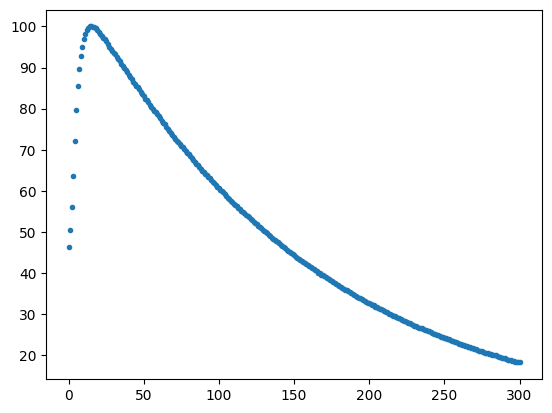

In [16]:
plt.plot(data[1:, 0], data[1:, 1], marker='.', ls='')
plt.show()

## Letura con Pandas

In [1]:
import pandas as pd

In [57]:
file_path = "/media/luis/TOMO/BeamData/6X/PDD/6X_All.data"

names = ["z", "30", "40", "60", "80", "100", "150", "200", "300", "400"]

df = pd.read_csv(file_path, header=12, names=names)

In [46]:
df

,z,30,40,60,80,100,150,200,300,400
0,1.0,50.4,51.3,53.3,55.1,56.5,63.1,64.9,71.0,74.8
1,2.0,56.0,57.1,58.9,60.5,61.6,69.3,69.6,75.4,78.8
2,3.0,63.7,64.8,66.3,67.6,68.7,76.4,75.7,80.8,83.6
3,4.0,72.1,73.1,74.3,75.4,76.3,83.0,82.2,86.3,88.3
4,5.0,79.6,80.4,81.4,82.1,82.9,88.0,87.8,91.0,92.1
...,...,...,...,...,...,...,...,...,...,...
295,296.0,18.5,19.1,20.3,21.5,22.5,24.4,26.0,27.9,29.0
296,297.0,18.4,19.0,20.2,21.3,22.4,24.3,25.9,27.8,28.9
297,298.0,18.3,18.9,20.1,21.3,22.3,24.2,25.7,27.7,28.7
298,299.0,18.3,18.8,20.0,21.2,22.1,24.1,25.6,27.5,28.5


<Axes: xlabel='z'>

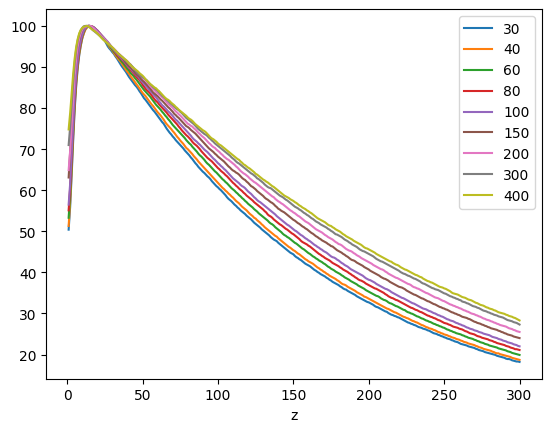

In [47]:
df.plot(x='z')

In [50]:
df["30"]

0      50.4
1      56.0
2      63.7
3      72.1
4      79.6
       ... 
295    18.5
296    18.4
297    18.3
298    18.3
299    18.2
Name: 30, Length: 300, dtype: float64

In [51]:
df[["z", "30"]]

,z,30
0,1.0,50.4
1,2.0,56.0
2,3.0,63.7
3,4.0,72.1
4,5.0,79.6
...,...,...
295,296.0,18.5
296,297.0,18.4
297,298.0,18.3
298,299.0,18.3


In [116]:
pdd100 = df[["z", "100"]].to_numpy()

## Load mcc file

In [117]:
mcc_file = "/home/luis/Documents/GitHub/relative_dose_1d/src/relative_dose_1d/test_data/X06 OPEN 10X10 PDD WAT 221214 13'13'42.mcc"

In [118]:
with open(mcc_file, mode="r") as file:
    data_as_list = [line.strip() for line in file]

In [119]:
# Find the beginning and end index of the data
start_index = data_as_list.index('BEGIN_DATA') + 1  
end_index = data_as_list.index('END_DATA')         

In [120]:
data = data_as_list[start_index: end_index]
data = [line.split() for line in data]

In [121]:
data_array = np.array(data).astype(float)

In [72]:
ref_mean = np.mean(data_array[:,2])
ref_mean

np.float64(6.9504642857142835)

In [122]:
#pdd_mcc = data_array[:,1]*ref_mean/data_array[:,2]
pdd_mcc = data_array[:,1]

In [123]:
pdd_mcc = 100*pdd_mcc/np.amax(pdd_mcc)

In [124]:
pdd100_mcc = np.stack((data_array[:,0], pdd_mcc), axis=1)

In [125]:
pdd100_mcc.shape

(42, 2)

In [126]:
pdd100_mcc

array([[  0.        ,  53.48384341],
       [  2.        ,  64.52459923],
       [  4.        ,  82.53304186],
       [  6.        ,  91.60887482],
       [  8.        ,  96.49228604],
       [ 10.        ,  98.84039399],
       [ 12.        ,  99.86557113],
       [ 14.        , 100.        ],
       [ 16.        ,  99.71355344],
       [ 18.        ,  99.11678979],
       [ 20.        ,  98.33534348],
       [ 25.        ,  96.12668978],
       [ 30.        ,  93.67681793],
       [ 35.        ,  91.35006784],
       [ 40.        ,  89.12633801],
       [ 45.        ,  86.84732901],
       [ 50.        ,  84.45273632],
       [ 60.        ,  80.07563194],
       [ 70.        ,  75.61183979],
       [ 80.        ,  71.60284436],
       [ 90.        ,  67.49334137],
       [100.        ,  63.7934067 ],
       [110.        ,  60.13241871],
       [120.        ,  56.74405749],
       [130.        ,  53.38082316],
       [140.        ,  50.35303282],
       [150.        ,  47.41444294],
 

In [76]:
import matplotlib.pyplot as plt

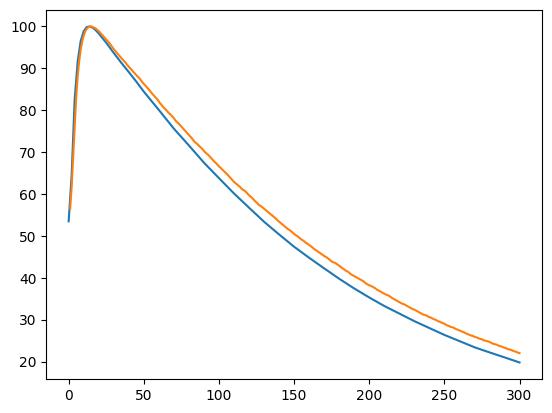

In [127]:
plt.plot(data_array[:,0], pdd_mcc)
plt.plot(pdd100[:,0], pdd100[:,1])

In [58]:
from relative_dose_1d.tools import gamma_1D

In [128]:
gd, gp, n = gamma_1D(pdd100, pdd100_mcc)

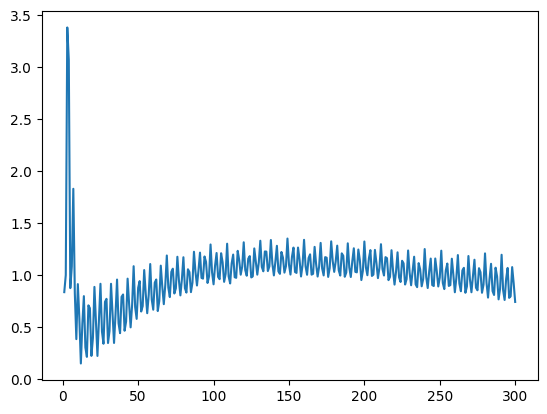

In [129]:
plt.plot(gd[:,0], gd[:,1])

In [112]:
gp

50.0